<a href="https://colab.research.google.com/github/nirmalaraj77/Python/blob/main/Exploratory_Data_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# Import libraries and datasets

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

books = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_books.csv')
unemployment = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_unemployment.csv')
salaries = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_salaries.csv')
divorce = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_divorce.csv')
planes = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/datasets/refs/heads/main/edap_planes.csv')



## **Initial Exploration and Datatypes**
* .head
* .info
* .describe
* .value_counts
* .sns.histplot
* .sns.boxplot
* .dtypes
* .astype(data_type)
* .isin
* select_dtypes

In [31]:
# Count the values associated with each continent in unemployment
print(unemployment["continent"].value_counts())

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64


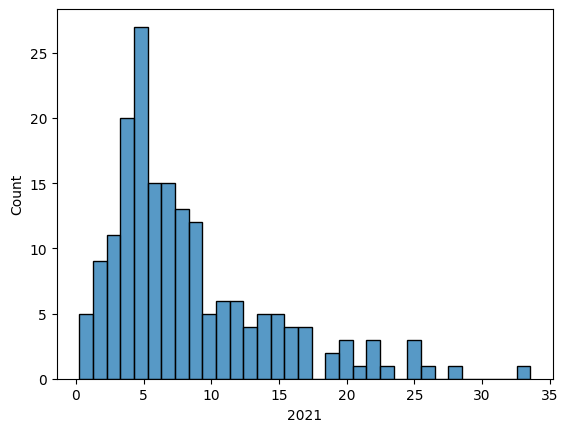

In [27]:
# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=unemployment, x='2021', binwidth=1)
plt.show()

In [29]:
# find datatype
print(books.dtypes)

# change datatype for year from float to whole number
books['year'] = books['year'].astype(int)
print(books.dtypes)

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object
name       object
author     object
rating    float64
year        int64
genre      object
dtype: object


In [44]:
# Validate categorical data
books[books['genre'].isin(['Fiction', 'Non Fiction'])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


   rating  year
0     4.7  2016
1     4.6  2011
2     4.7  2018
3     4.7  2017
4     4.8  2019
2009
2019


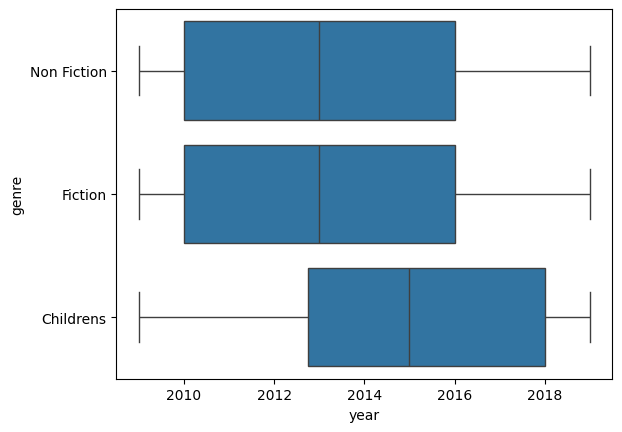

In [55]:
# Validate numerical data - display all columns with number formats

print(books.select_dtypes('number').head())
print(books['year'].min())
print(books['year'].max())
sns.boxplot(data=books, x='year', y='genre')
plt.show()


In [56]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment["continent"].isin(["Oceania"])

# Print unemployment without records related to countries in Oceania
print(unemployment[not_oceania])

    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

# **Data Summarization**

* .groupby
* .agg
* create named tuples
* sns.barplot


             year      
              min   max
genre                  
Childrens    2009  2019
Fiction      2009  2019
Non Fiction  2009  2019
        rating    year
mean  4.608571     NaN
std   0.226941     NaN
min        NaN  2009.0
max        NaN  2019.0
             mean_rating  std_rating  median_year
genre                                            
Childrens       4.780000    0.122370       2015.0
Fiction         4.570229    0.281123       2013.0
Non Fiction     4.598324    0.179411       2013.0


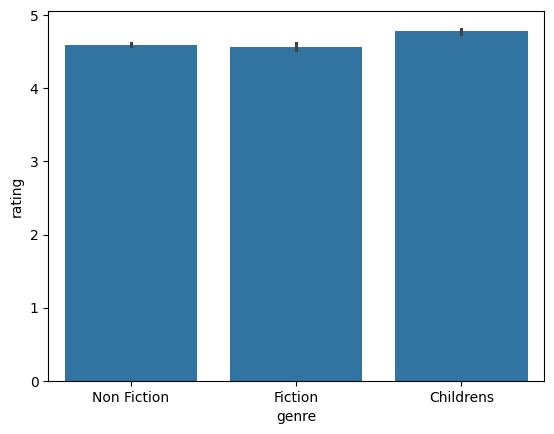

In [70]:
# Chain groupby and agg
print(books.groupby('genre').agg({'year': ['min', 'max']}))
print(books.agg({'rating': ['mean', 'std'], 'year': ['min', 'max']}))
print(books.groupby('genre').agg(mean_rating=('rating', 'mean'), std_rating=('rating', 'std'), median_year=('year', 'median')))

sns.barplot(data=books, x='genre', y='rating')
plt.show()